## **Modelo de avaliação para determinar se a qualidade do vinho** 
#### (1- bom, 0- ruim)
#### Esse modelo foi modificado para se adequar ao algoritimo utilizado(binário), dados tratados.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Carga Dataset(Doenças Cardíacas)

In [2]:
# Importando o dataset no path local
url = "https://raw.githubusercontent.com/rcostneto/Dataset/main/Datasetcleveland1.csv"
path = "../data/wine.csv"

colunas = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfurdioxide','total_sulfurdioxide','density','pH','sulphates','alcohol','quality']

# Lendo os dados do dataset
dataset = pd.read_csv(path, names=colunas, skiprows=1, delimiter=',')

# Exibe as 5 primeiras linhas por padrão
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Uso do Holdout para treino e teste separadamente

In [3]:
test_size = 0.40 # tamanho da amostragem escolhida
seed =7 # escolha da seed padrão

# Dividindo o dados de treino com dados de teste
array = dataset.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout

# Usando validação cruzada e sua métrica
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada

### Modelos - Classificação e comparação entre modelos

KNN: 0.735632 (0.080048)
NB: 0.759310 (0.056903)
SVM: 0.702184 (0.094143)
LR: 0.759425 (0.082238)
CART: 0.699195 (0.090115)
Bagging: 0.775977 (0.086826)
ET: 0.796207 (0.080511)
Voting: 0.752644 (0.080180)


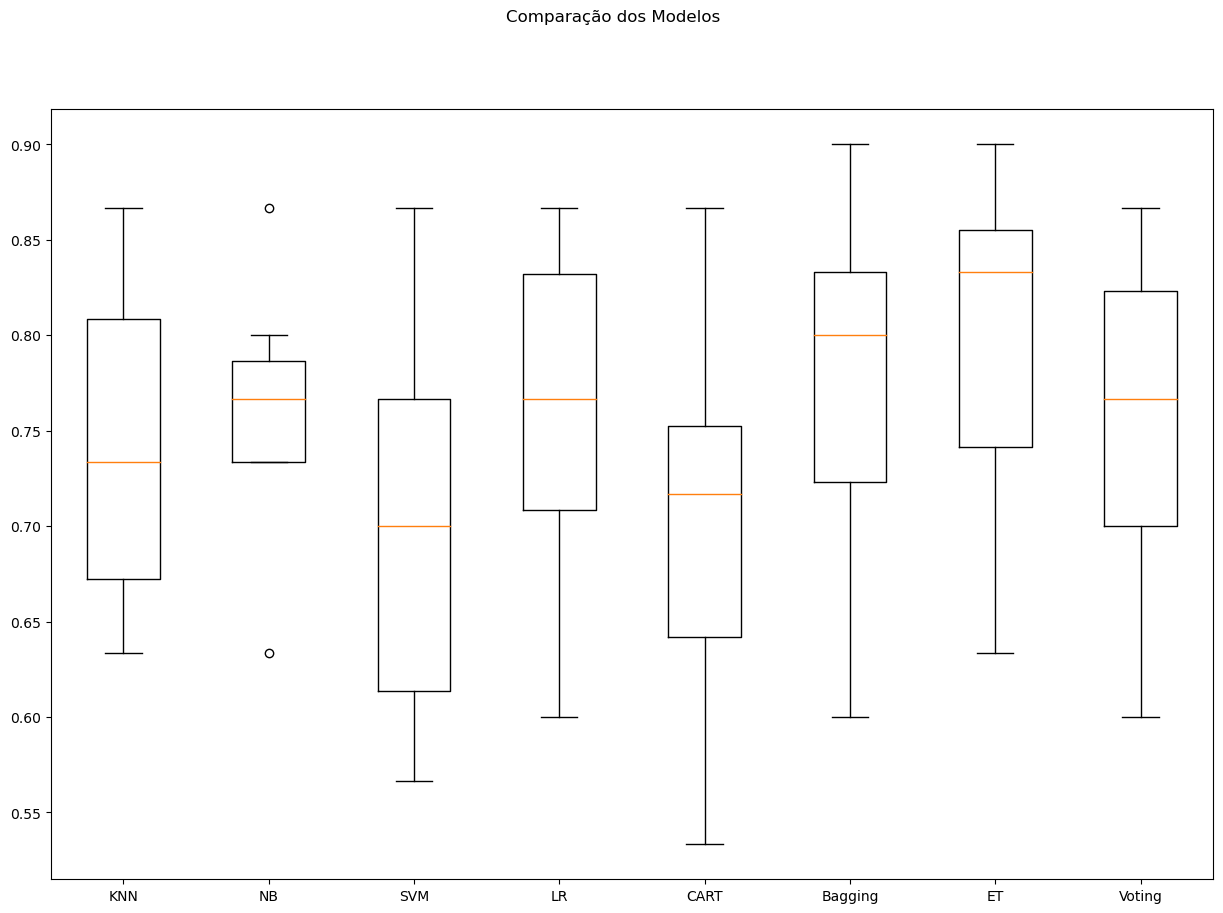

In [4]:
np.random.seed(7) # Determinação da seed global

# Criando lista para armazenar modelos
models = []

# Criando modelo e armazenando na lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))

# Definindo os parâmetros do classificador-base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression()
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base,
n_estimators=num_trees)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,
max_features=max_features)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar e plotar os modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Classificação para comparação entre modelos normalizados, originais e padrões.

KNN-orig: 0.736 (0.080)
NB-orig: 0.759 (0.057)
SVM-orig: 0.702 (0.094)
LR-orig: 0.759 (0.082)
Vot-orig: 0.753 (0.073)
CART-orig: 0.719 (0.084)
Bag-orig: 0.779 (0.086)
ET-orig: 0.790 (0.088)
KNN-padr: 0.713 (0.074)
NB-padr: 0.756 (0.069)
SVM-padr: 0.766 (0.109)
LR-padr: 0.786 (0.102)
Vot-padr: 0.783 (0.091)
CART-padr: 0.713 (0.077)
Bag-padr: 0.796 (0.087)
ET-padr: 0.773 (0.078)
KNN-norm: 0.736 (0.054)
NB-norm: 0.756 (0.069)
SVM-norm: 0.766 (0.081)
LR-norm: 0.770 (0.091)
Vot-norm: 0.773 (0.094)
CART-norm: 0.713 (0.081)
Bag-norm: 0.776 (0.083)
ET-norm: 0.796 (0.078)


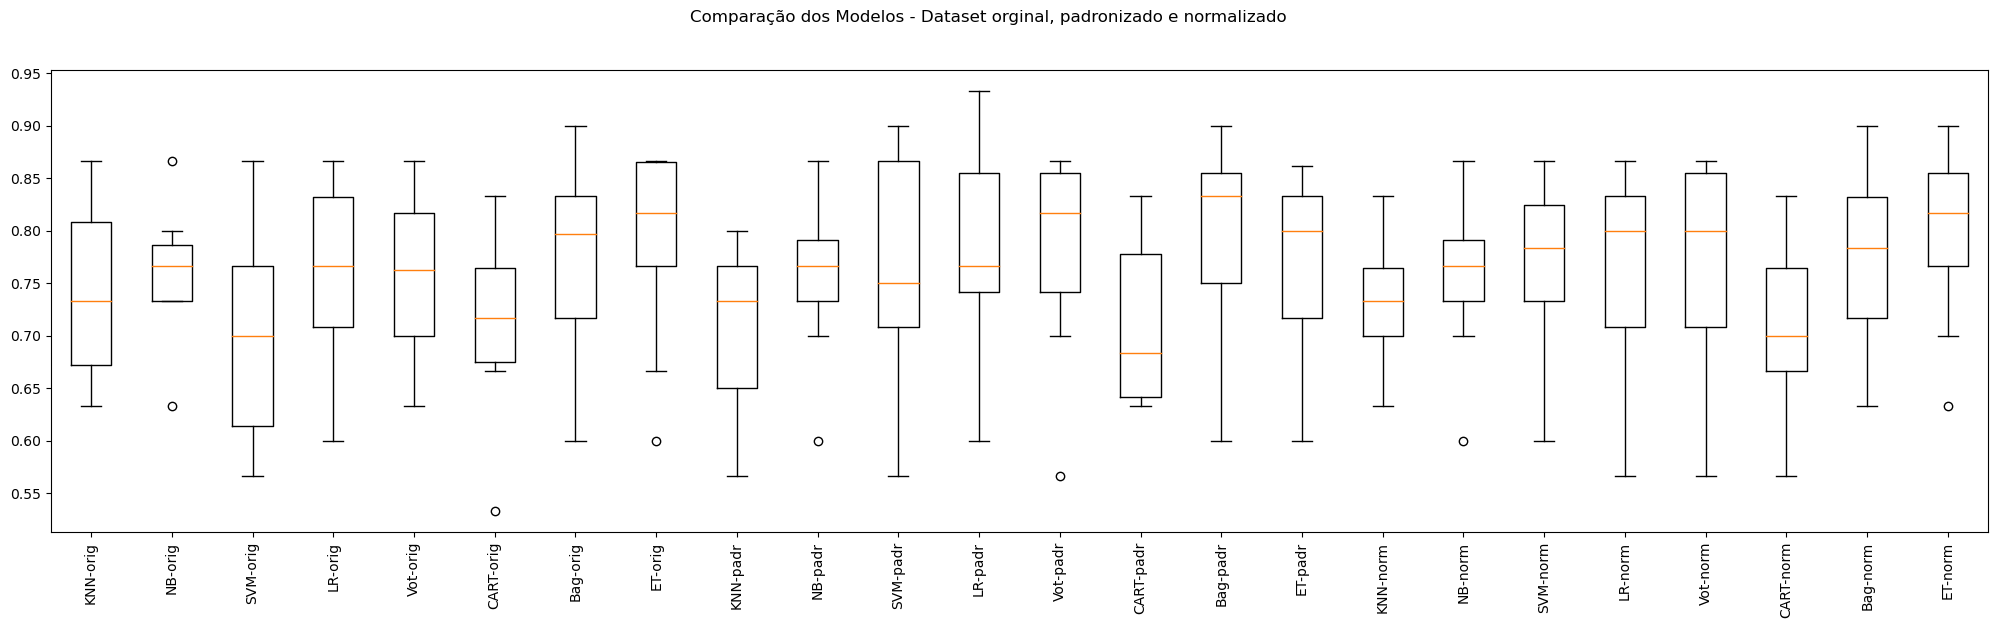

In [5]:
np.random.seed(7) # definindo uma seed global para dados normalizados, originais e padroes

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão comparados
knn = ('KNN', KNeighborsClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
reg_log = ('LR', LogisticRegression())
voting = ('Voting', VotingClassifier(bases))
cart = ('CART', DecisionTreeClassifier())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))

# Transformações que serão utilizadas para padronização e normalização
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('Vot-orig', Pipeline([voting])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Melhoria dos hiperparâmetros
##### OBS: Param_grid escolhido KNN devido possuir melhor resultado mediante comparção com SVM(SVC) e Regressão Logistica(LR)

In [6]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []
# Definindo os componentes do pipeline
# svm = ('SVM', SVC())
# reg_log = ('LR', LogisticRegression())
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('KNN-orig', Pipeline(steps=[knn])))
pipelines.append(('KNN-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('KNN-norm', Pipeline(steps=[min_max_scaler, knn])))

# param_grid = {
#     'SVM__C': [0.1, 0.25, 0.5, 1.0, 5.0, 10, 50, 100],
#     'SVM__gamma':[1, 0.1],
#     'SVM__kernel': ["linear", "poly", "rfb", "simoid"],
# }

# param_grid = {
#     'SVM__C': [0.1, 0.5, 1.0, 100],
#     'SVM__kernel': ["linear", "poly", "rfb", "simoid"],
# }

# param_grid = {'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
#               'LR__penalty':['none', 'elasticnet', 'l1', 'l2'],
#               'LR__C':[0.001, 0.01, 0.1, 1, 2.5, 5, 10, 50, 100]}

param_grid = {
'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV

for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: KNN-orig - Melhor: 0.759080 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Sem tratamento de missings: KNN-padr - Melhor: 0.752874 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: KNN-norm - Melhor: 0.746207 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


### Conclusão do modelo

In [19]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# model = BaggingClassifier(base_estimator=base, n_estimators=num_trees)
# model = SVC(C= 0.1, kernel= 'linear')
# model = LogisticRegression(C = 2.5, penalty = 'l2', solver = 'liblinear')
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
# model = extra_trees('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
model.fit(rescaledX, y_train)
modelo_nome = 'KNN'

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(predictions)

0.66
[0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0.]


In [20]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

### Entradas de dados simuladas para uso do melhor modelo

In [21]:
# Novos dados - não sabemos a classe!
data = {'fixed_acidity':  [7.8, 7.3, 7.8],
        'volatile_acidity': [0.76, 0.65, 0.61],
        'citric_acid': [0.04, 0.0, 0.29],
        'residual_sugar': [2.3, 1.2, 1.6],     
        'chlorides': [0.092, 0.065, 0.114],
        'free_sulfurdioxide': [15.0, 15.0, 9.0],
        'total_sulfurdioxide': [54.0, 21.0, 29.0],   
        'density': [0.997, 0.9946, 0.9974],
        'pH':[3.26, 3.39, 3.26],
        'sulphates':[0.65, 0.47, 1.56],       
        'alcohol':[9.8, 10.0, 9.1]
        }

atributos = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfurdioxide','total_sulfurdioxide','density','pH','sulphates','alcohol']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-4.70491284e-01  1.28923746e+00 -1.21183416e+00 -2.06910444e-01
  -3.34367896e-02 -2.56210123e-03  7.76241818e-02 -2.46234656e-01
  -2.09720064e-01 -2.22447670e-01 -3.18644079e-01]
 [-7.35893896e-01  6.64342375e-01 -1.39653337e+00 -1.00279792e+00
  -4.81689393e-01 -2.56210123e-03 -9.01868080e-01 -1.67289466e+00
   6.29548322e-01 -1.07014600e+00 -1.18135384e-01]
 [-4.70491284e-01  4.37107797e-01 -5.74640356e-02 -7.13384290e-01
   3.31806072e-01 -6.16236589e-01 -6.64415410e-01 -8.45798770e-03
  -2.09720064e-01  4.06313834e+00 -1.02042451e+00]]


### **Resultado simulado de saída**
##### *(1- possui doênças cardíacas, 0- ausência de doênças cardiovasculares)*

In [22]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 0.]


Gerar o arquivo

In [23]:
# Criando o arquivo de nome KNN.pkl

artifact_pkl_filename = modelo_nome+'.pkl'
pkl_local_path = '../ml_model/'+artifact_pkl_filename
with open(pkl_local_path, 'wb') as model_file:
    pickle.dump(model, model_file)

#### Carregamento

In [24]:
# Carregando o arquivo pkl criado

loaded_pkl_model = pickle.load(open(pkl_local_path, 'rb'))

pkl_results = loaded_pkl_model.score(X_test, y_test)
print('Pickle:', pkl_results)

Pickle: 0.515


#### Realizando a predição

In [25]:
loaded_pkl_model.predict(X_test[0:5])

array([0., 0., 0., 0., 0.])